In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/Global_Superstore2.csv',encoding='cp850')

In [5]:
df['Order Year'] = df['Order Date'].str[-4:]
df['Order Month'] = df['Order Date'].str[3:5]

df['Product Category'] = df['Category'].str.cat(df['Sub-Category'].astype('str'), sep='-')

1. Calculate frequency of purchase 

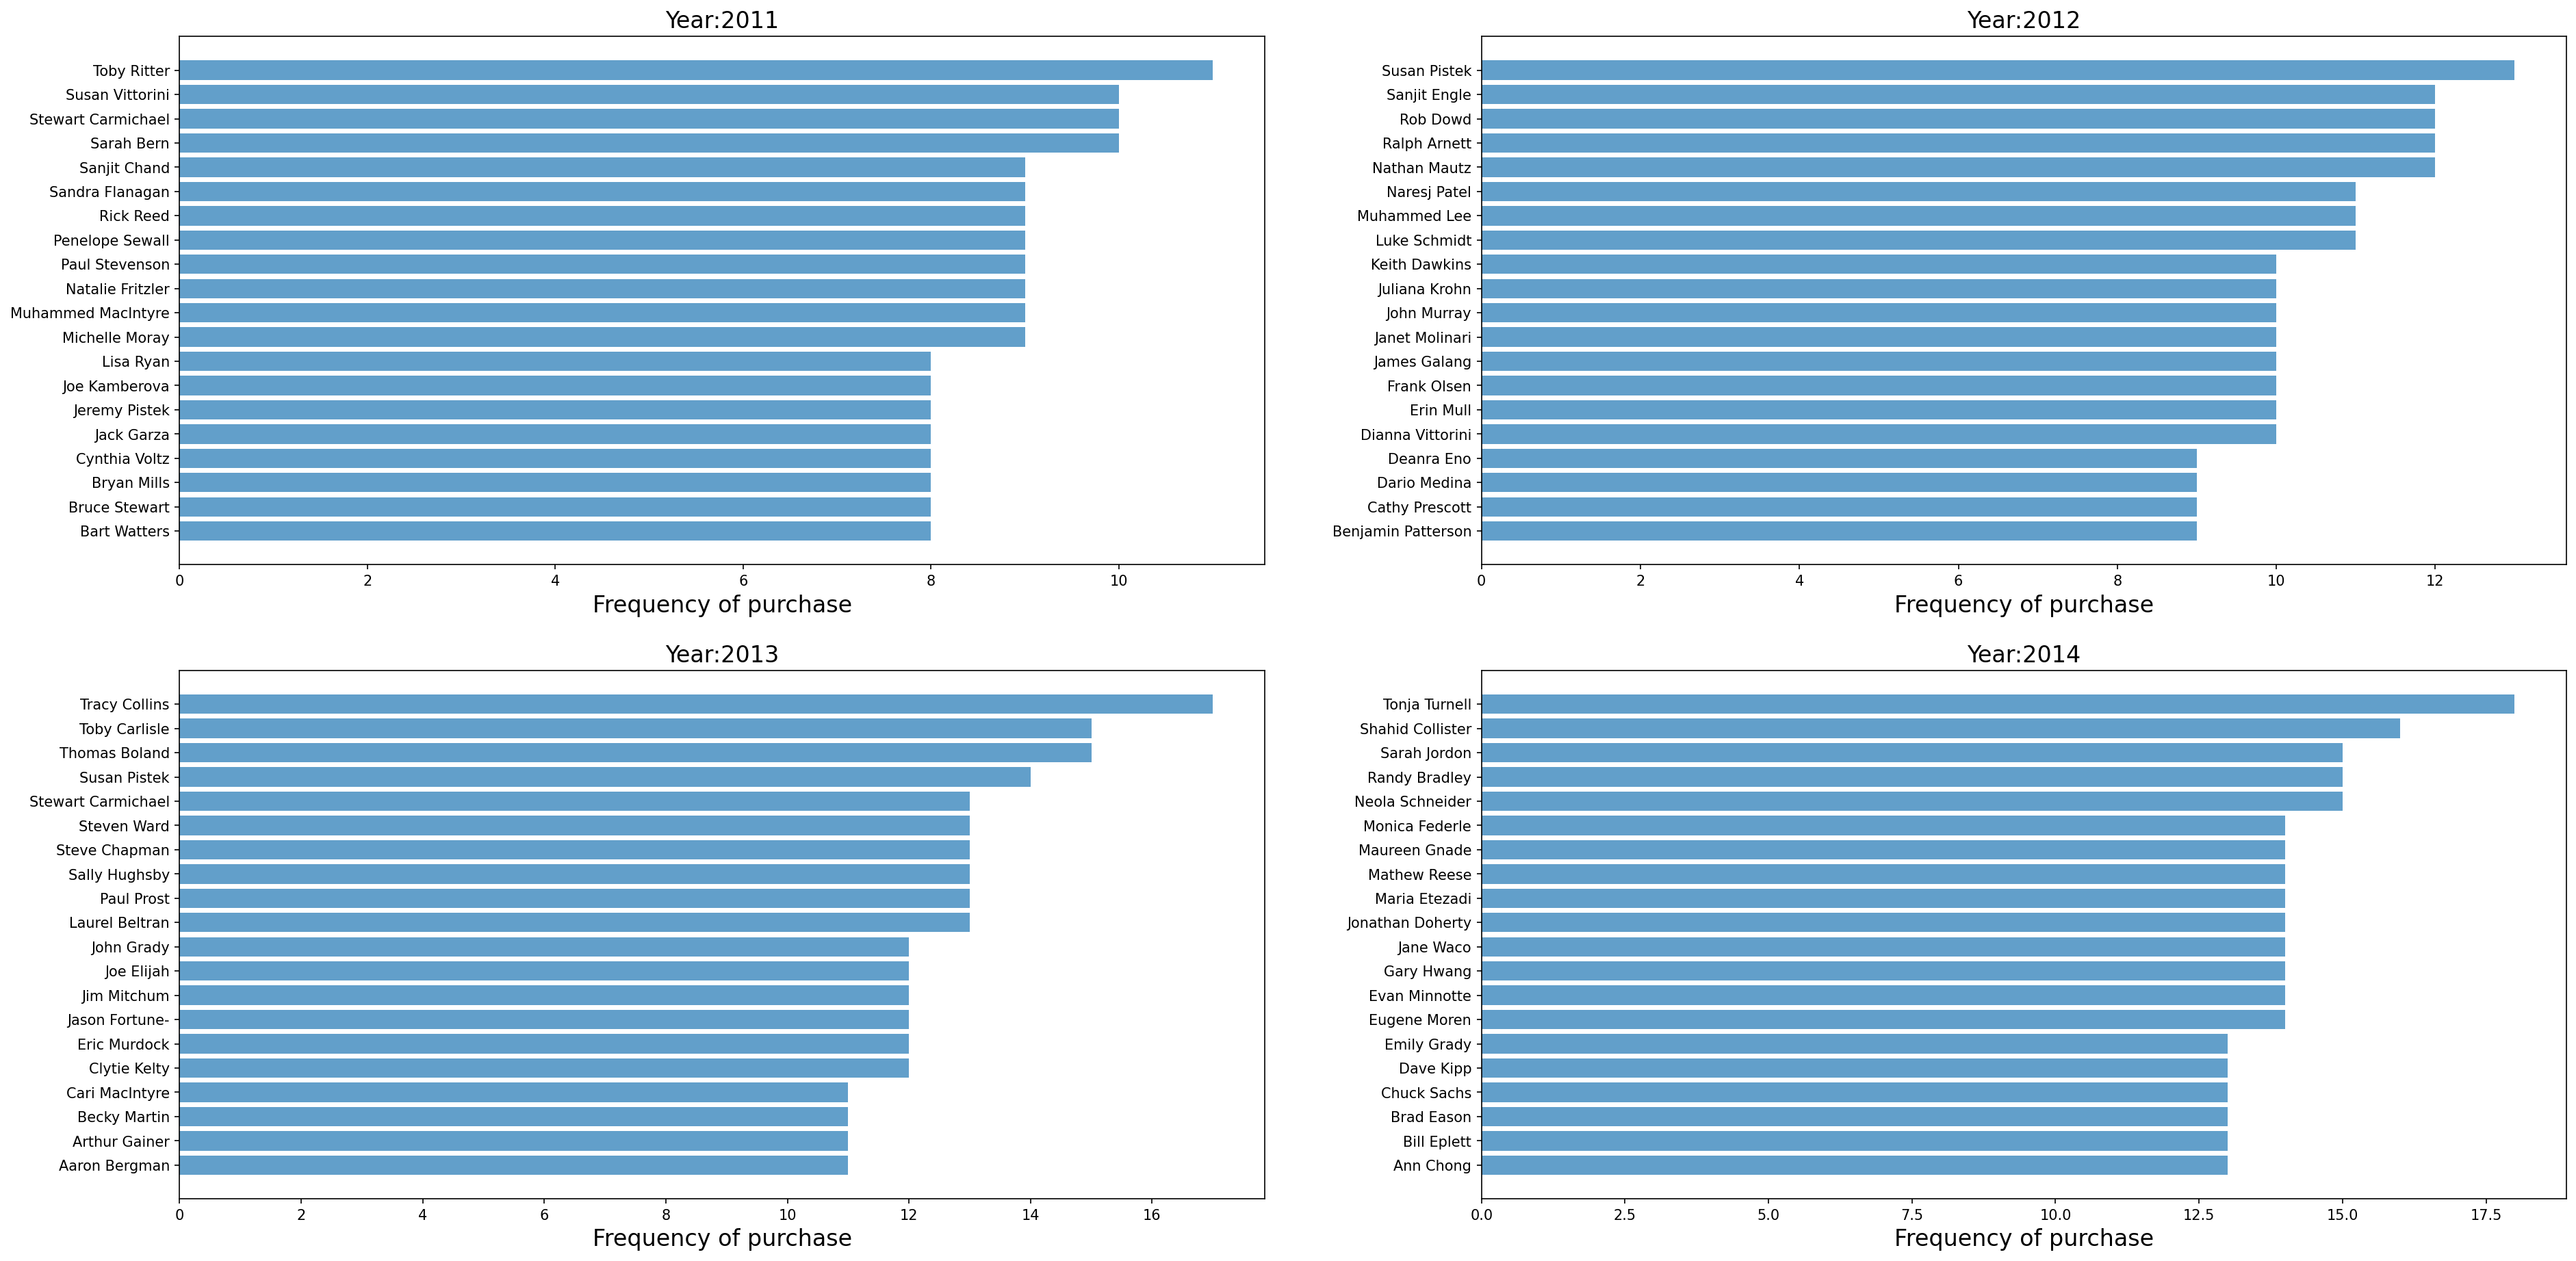

In [6]:
Top = 20 

df_purchase_cnt = df.groupby(['Customer Name','Order Year']).count().reset_index()
year_arr = np.sort(df_purchase_cnt['Order Year'].unique())

fig, axes = plt.subplots(2,2,figsize=(30,15),dpi=150)

for i in range(len(year_arr)):
    df_purchase_cnt_by_year = df_purchase_cnt[df_purchase_cnt['Order Year']==year_arr[i]].sort_values(by='Row ID',ascending=False).reset_index(drop=True)
    # visualize
    axes[i//2][i%2].barh(df_purchase_cnt_by_year.loc[:Top-1,'Customer Name'].sort_values(),df_purchase_cnt_by_year.loc[:Top-1,'Row ID'].sort_values(),alpha=0.7)
    axes[i//2][i%2].set_title('Year:'+year_arr[i],size=16)
    axes[i//2][i%2].set_xlabel('Frequency of purchase',size=16)

2. Do customers with high frequency contribute more to the revenue?

In [7]:
Top = 20
df_profit_mean = df.groupby(['Customer Name','Order Year']).mean().reset_index()
for i in range(len(year_arr)):
    df_purchase_cnt_by_year = df_purchase_cnt[df_purchase_cnt['Order Year']==year_arr[i]].sort_values(by='Row ID',ascending=False).reset_index(drop=True)
    df_profit_mean_by_year = df_profit_mean[df_profit_mean['Order Year']==year_arr[i]].sort_values(by='Profit',ascending=False).reset_index(drop=True)
    # Calculating profit Avg. ranking #Top% by year
    Top_rate = []
    for t in range(Top):
        Top_rate.append(round(100*df_profit_mean_by_year[df_profit_mean_by_year['Customer Name']==df_purchase_cnt_by_year.loc[t,'Customer Name']].index[0]/len(df_profit_mean_by_year)))
    print('==============Year:',year_arr[i],'==============')
    display(pd.DataFrame.from_dict({'Customer Name':df_purchase_cnt_by_year.loc[:19,'Customer Name'].to_list(),'Profit Avg. Ranking #Top%':Top_rate}))

==============Year: 2011 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,Rick Reed,85
1,Toby Ritter,60
2,Bruce Stewart,88
3,Penelope Sewall,29
4,Jack Garza,28
5,Sarah Bern,14
6,Natalie Fritzler,66
7,Joe Kamberova,28
8,Cynthia Voltz,44
9,Jeremy Pistek,63


==============Year: 2012 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,Benjamin Patterson,29
1,John Murray,83
2,Rob Dowd,45
3,Ralph Arnett,29
4,Janet Molinari,56
5,Luke Schmidt,65
6,Susan Pistek,13
7,Nathan Mautz,49
8,Cathy Prescott,79
9,Dario Medina,25


==============Year: 2013 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,Cari MacIntyre,79
1,Aaron Bergman,24
2,Steve Chapman,75
3,Joe Elijah,19
4,Jim Mitchum,45
5,Sally Hughsby,68
6,Arthur Gainer,43
7,Steven Ward,48
8,Eric Murdock,36
9,John Grady,53


==============Year: 2014 ==============


,Customer Name,Profit Avg. Ranking #Top%
0,Shahid Collister,71
1,Brad Eason,83
2,Monica Federle,39
3,Gary Hwang,54
4,Jonathan Doherty,84
5,Bill Eplett,4
6,Mathew Reese,28
7,Randy Bradley,73
8,Tonja Turnell,63
9,Jane Waco,2


3. Profitable customer segment for each year

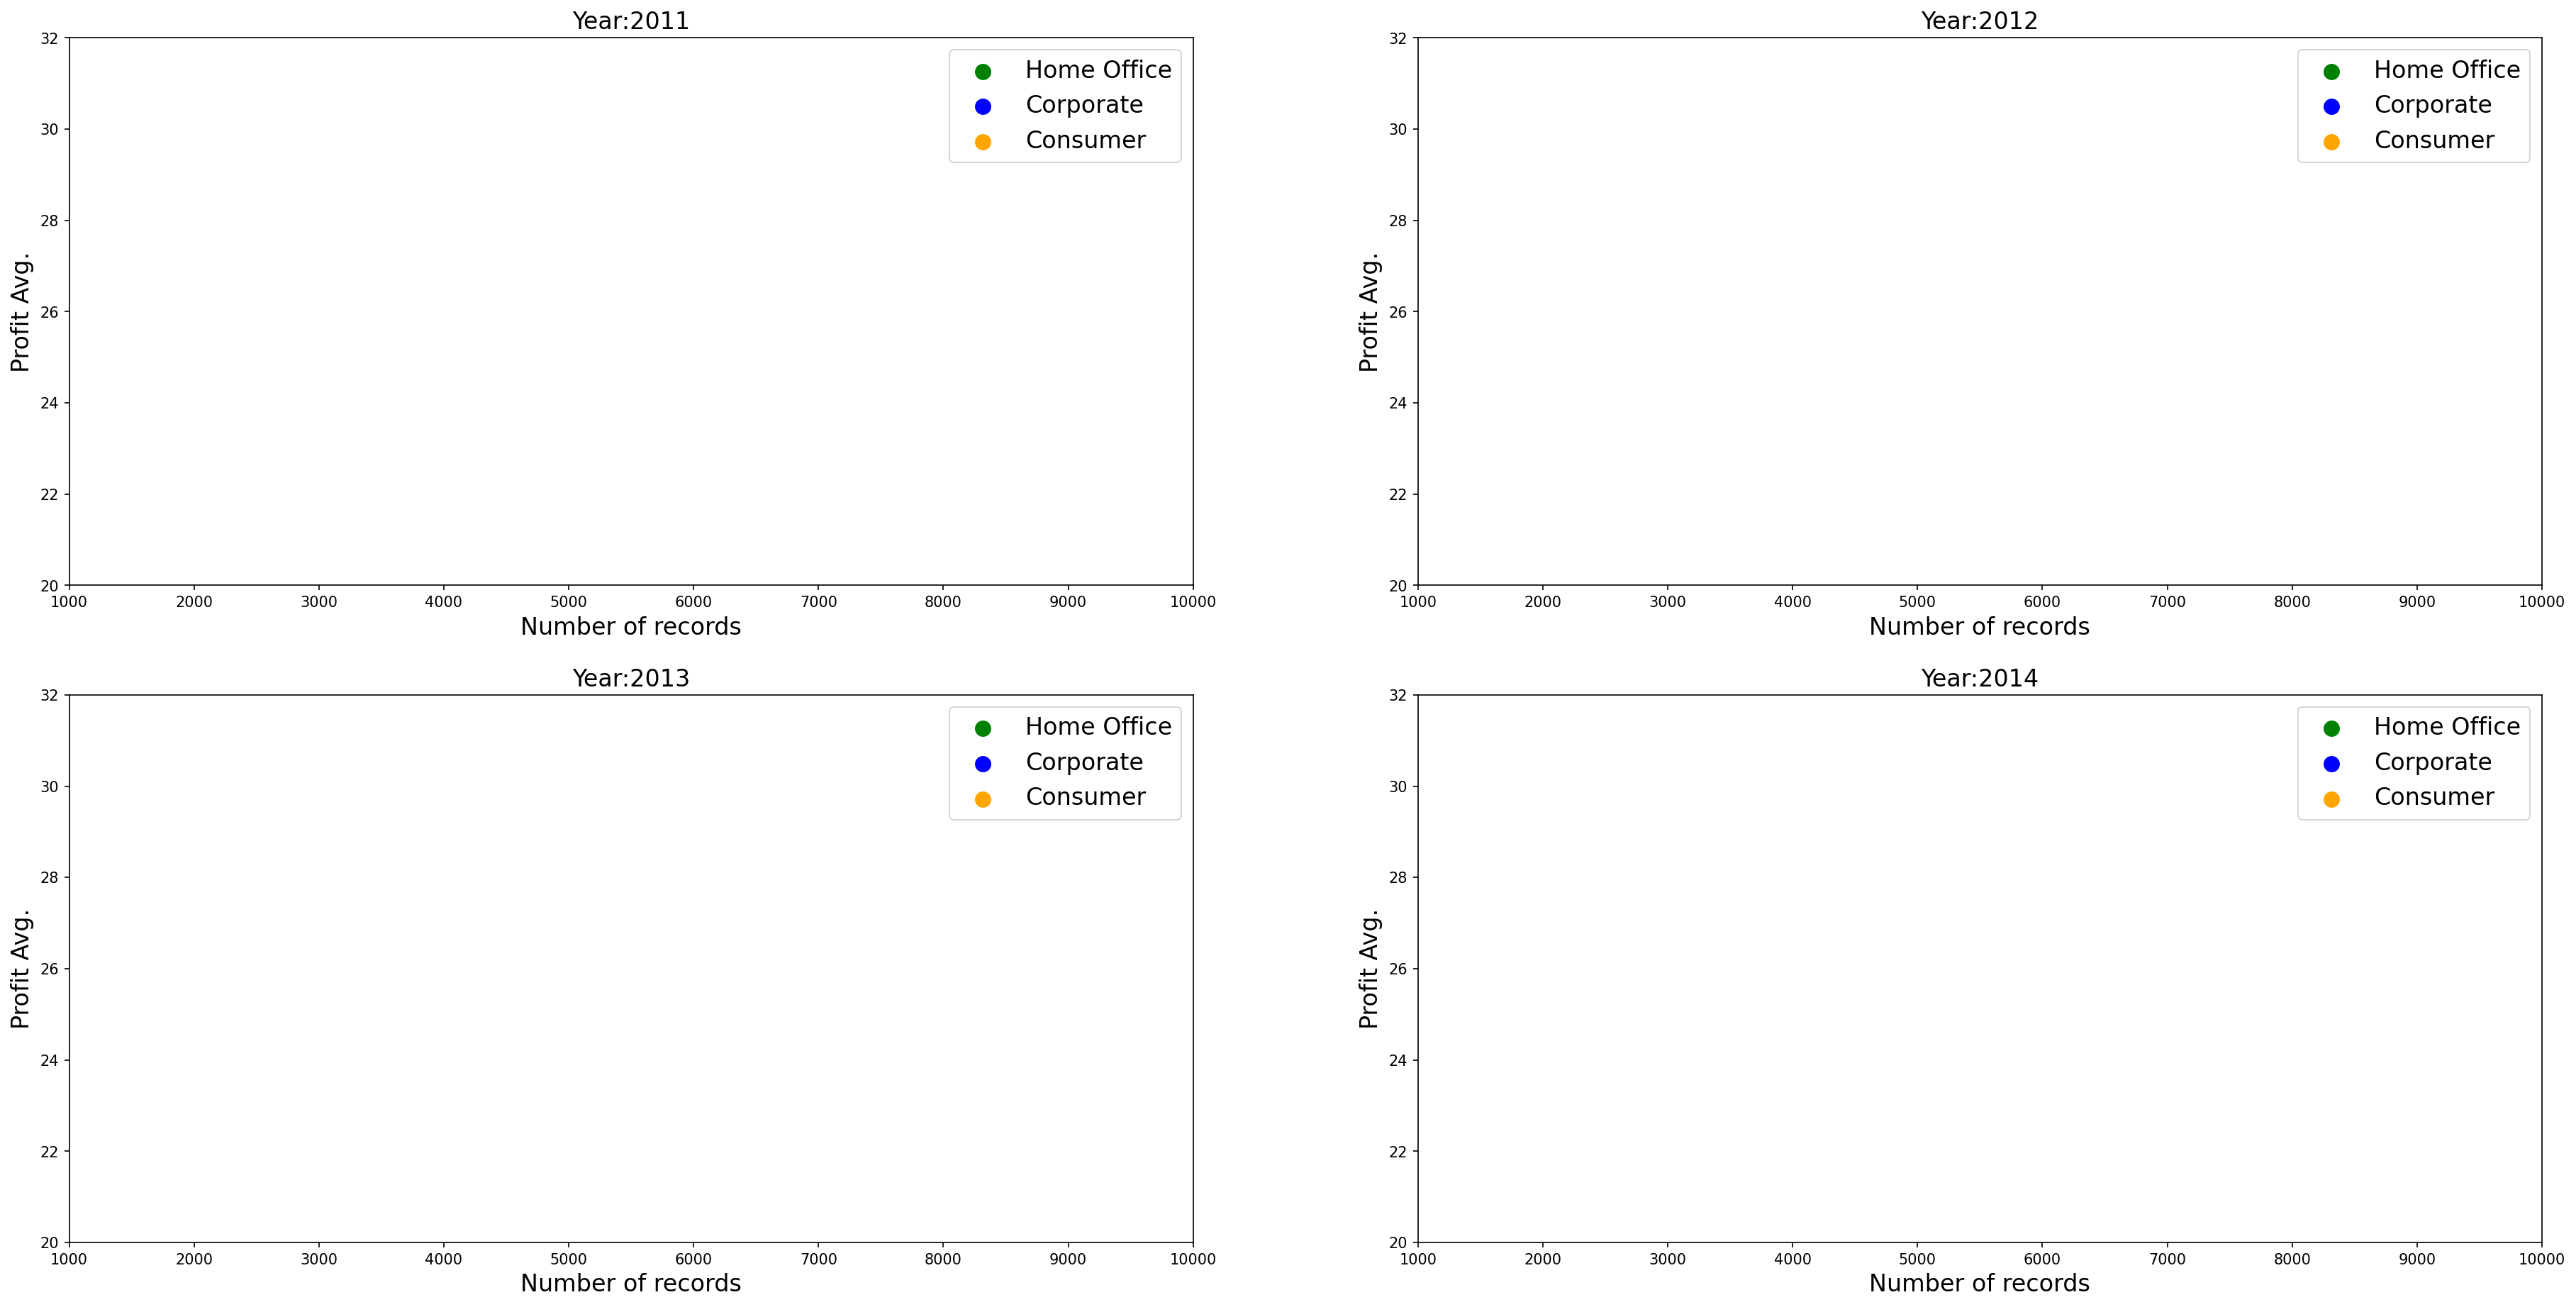

In [8]:
df_profit_mean_by_seg = df.groupby(['Segment','Order Year']).mean().reset_index()
df_purchase_cnt_by_seg = df.groupby(['Segment','Order Year']).count().reset_index()

fig, axes = plt.subplots(2,2,figsize=(30,15),dpi=150)
color = ['green','blue','orange']
for i in range(len(year_arr)):
    df_profit_mean_by_seg_by_year = df_profit_mean_by_seg[df_profit_mean_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    df_purchase_cnt_by_seg_by_year = df_purchase_cnt_by_seg[df_purchase_cnt_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    # Visualize
    Seg_lst = df_profit_mean_by_seg_by_year['Segment'].to_list()
    for s in range(len(Seg_lst)):
        df_temp_cnt = df_purchase_cnt_by_seg_by_year[df_purchase_cnt_by_seg_by_year['Segment']==Seg_lst[s]]
        df_temp_mean = df_profit_mean_by_seg_by_year[df_profit_mean_by_seg_by_year['Segment']==Seg_lst[s]]
        axes[i//2][i%2].scatter(df_temp_cnt['Row ID'],df_temp_mean['Profit'],label=Seg_lst[s],color=color[s],s=100)
        
    axes[i//2][i%2].set_title('Year:'+year_arr[i],size=16)
    axes[i//2][i%2].set_xlabel('Number of records',size=16)
    axes[i//2][i%2].set_ylabel('Profit Avg.',size=16)
    axes[i//2][i%2].set_xlim(1000,10000)
    axes[i//2][i%2].set_ylim(20,32)
    axes[i//2][i%2].legend(fontsize=16)

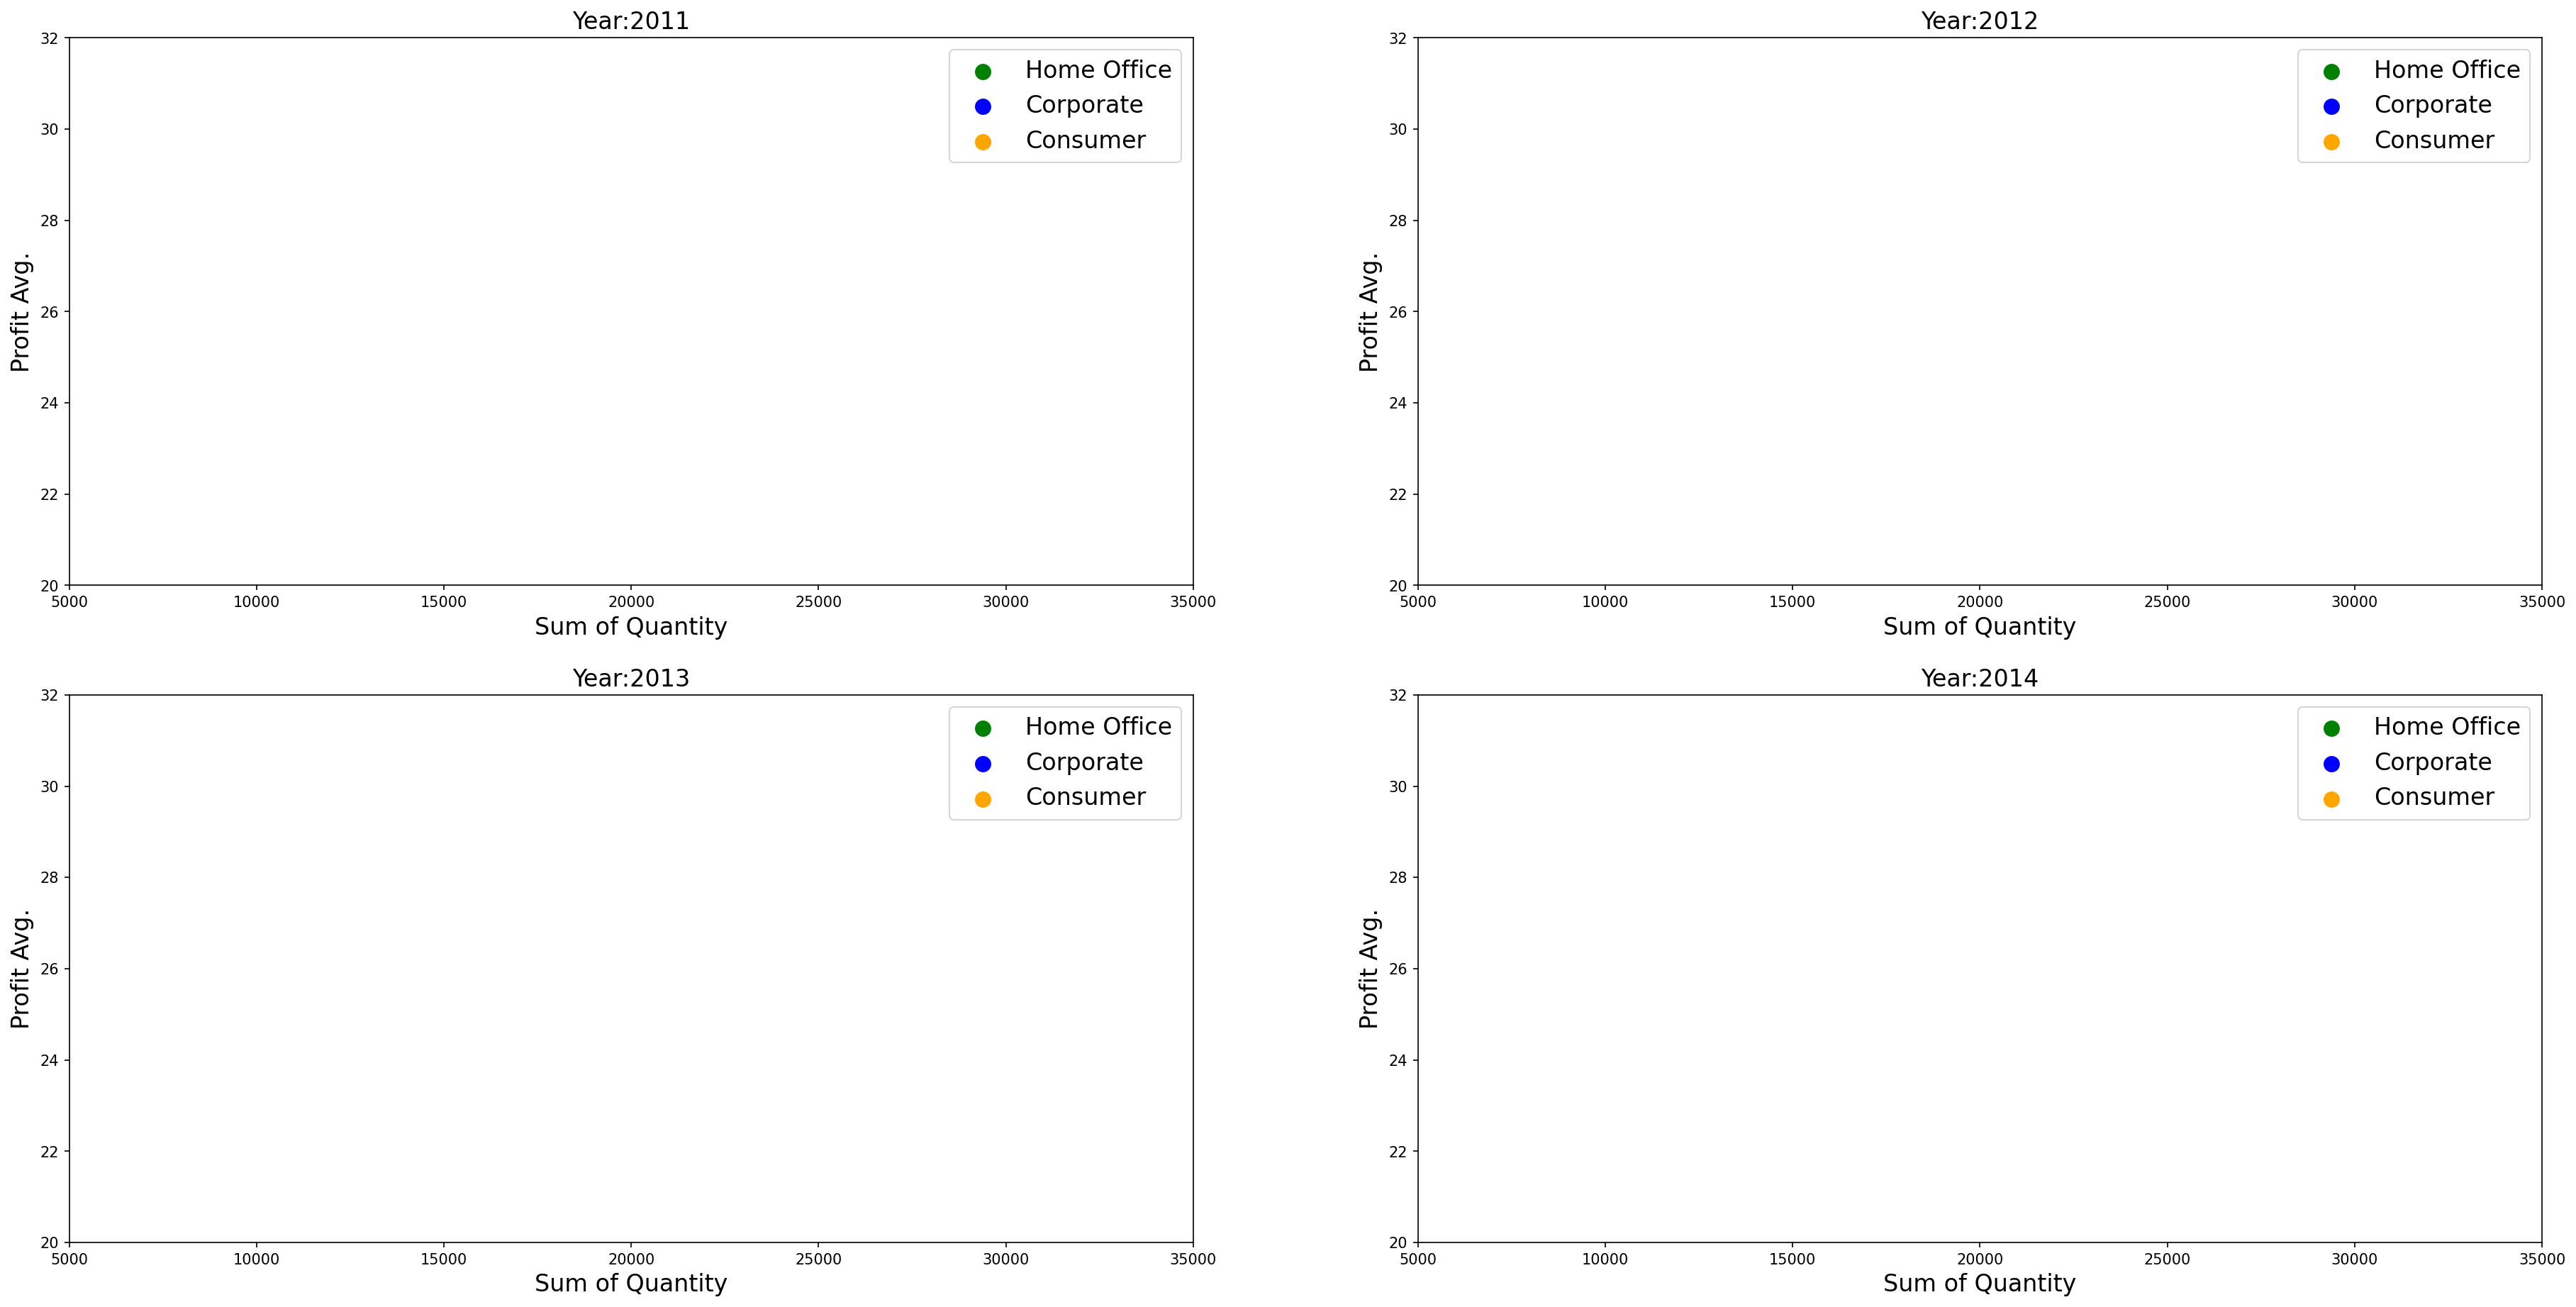

In [9]:
df_purchase_sum_by_seg = df.groupby(['Segment','Order Year']).sum().reset_index()

fig, axes = plt.subplots(2,2,figsize=(30,15),dpi=150)
color = ['green','blue','orange']
for i in range(len(year_arr)):
    df_profit_mean_by_seg_by_year = df_profit_mean_by_seg[df_profit_mean_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    df_purchase_sum_by_seg_by_year = df_purchase_sum_by_seg[df_purchase_sum_by_seg['Order Year']==year_arr[i]].sort_values(by='Segment',ascending=False).reset_index(drop=True)
    # Visualize
    Seg_lst = df_profit_mean_by_seg_by_year['Segment'].to_list()
    for s in range(len(Seg_lst)):
        df_temp_sum = df_purchase_sum_by_seg_by_year[df_purchase_sum_by_seg_by_year['Segment']==Seg_lst[s]]
        df_temp_mean = df_profit_mean_by_seg_by_year[df_profit_mean_by_seg_by_year['Segment']==Seg_lst[s]]
        axes[i//2][i%2].scatter(df_temp_sum['Quantity'],df_temp_mean['Profit'],label=Seg_lst[s],color=color[s],s=100)
        
    axes[i//2][i%2].set_title('Year:'+year_arr[i],size=16)
    axes[i//2][i%2].set_xlabel('Sum of Quantity',size=16)
    axes[i//2][i%2].set_ylabel('Profit Avg.',size=16)
    axes[i//2][i%2].set_xlim(5000,35000)
    axes[i//2][i%2].set_ylim(20,32)
    axes[i//2][i%2].legend(fontsize=16)